In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# [Bölüm 1: Türevin Temelleri: Tek Değişkenli Fonksiyonlar](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=488s)

## Bölüm 1.1: Fonksiyonun Tanımlanması ve Görselleştirilmesi

Bu kısımda üzerinde çalışacağımız basit bir skaler fonksiyonu (scalar function) tanımlıyor ve şeklini görmek için çizdiriyoruz.

**Kısa Özet:**
Basit bir matematiksel fonksiyonun kodlanması ve grafiğinin çizilmesi.

**Detaylı Açıklama:**
Burada `f(x)` adında Python fonksiyonu tanımlıyoruz. Matematiksel karşılığı şudur:


Bu, bir **parabol** (kavisli bir eğri) belirtir.

* `xs`: X ekseni için -5'ten +5'e kadar 0.25'lik adımlarla giden bir sayı dizisi oluşturur.
* `ys`: Bu x değerlerinin her biri için fonksiyonumuzun ürettiği çıktıları (y) hesaplar. Bu, sinir ağlarındaki **Forward Pass** (İleri Yayılım) işlemine benzer; girdiyi alıp bir çıktı üretiriz.
* `plt.plot`: Fonksiyonun şeklini görmemizi sağlar. Görselleştirme, fonksiyonun nerede minimum (en düşük) değere sahip olduğunu ve eğimin (slope) nerede sıfırlandığını anlamak için kritiktir.

```python
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
  return 3*x**2 - 4*x + 5

# Fonksiyonu test edelim (x=3.0 için)
print(f(3.0))

# Görselleştirme için veri hazırlığı
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
```

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
f(3.0)

20.0

In [ ]:
xs = np.arange(-5, 5, 0.25)
xs

In [ ]:
ys = f(xs)
ys

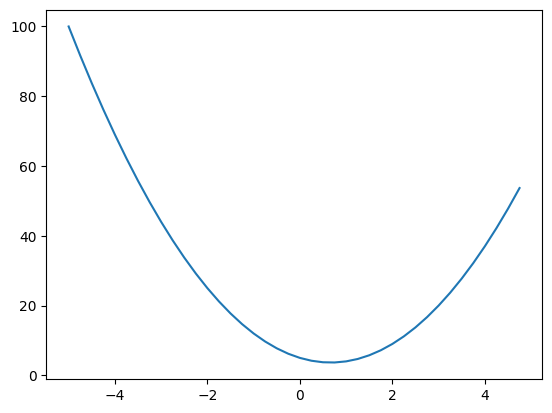

In [ ]:
plt.plot(xs, ys)

## Bölüm 1.2: Türevin Sayısal Tanımı (The Definition of Derivative)

İşte "sihrin" başladığı yer burası. Karpathy burada lisede öğrendiğimiz türev kurallarını ezberlemek yerine, türevin **fiziksel anlamını** kodlayarak gösteriyor.

**Kısa Özet:**
Türevin limit tanımını kullanarak, fonksiyonun belirli bir noktadaki eğimini (hassasiyetini) sayısal olarak hesaplamak.

**Detaylı Açıklama:**
Türev, bir girdiyi çok küçük bir miktar değiştirdiğimizde, çıktının buna nasıl tepki verdiğidir.
Kodda `h`, bu "çok küçük değişimi" (epsilon) temsil eder.

Formülümüz şudur:

$$\lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$


Karpathy'nin mantığıyla adım adım:

1. **`f(x)`:** Mevcut konumumuzdaki değer (örneğin x=2/3 iken).
2. **`f(x + h)`:** X'i `h` kadar (bir karınca adımı kadar) sağa ittiğimizde elde ettiğimiz yeni değer.
3. **Fark:** `f(x + h) - f(x)` -> Fonksiyon ne kadar arttı veya azaldı?
4. **Normalizasyon:** `/ h` -> Bu değişimi, attığımız adımın büyüklüğüne bölerek **eğimi (slope)** buluyoruz.

Bu işlem bize **"Fonksiyonun x noktasındaki duyarlılığını (sensitivity)"** verir. Eğer sonuç pozitifse fonksiyon yukarı gidiyordur, negatifse aşağı iniyordur.

**Kod/Örnek:**

```python
h = 0.000001  # Çok küçük bir adım (limit h->0 mantığı)
x = 2/3       # Türevini merak ettiğimiz nokta

# Türevin sayısal hesaplanması (Numerical Approximation)
turev = (f(x + h) - f(x)) / h

print(f"x={x} noktasındaki eğim (türev): {turev}")
```
**İpucu:**
Burada bulduğun sonuç (yaklaşık 0 veya çok küçük bir sayı) tesadüf değildir! Fonksiyonun grafiğine bakarsan `x = 2/3` noktası parabolün en dip noktasıdır. En dip noktada eğim (slope) her zaman **0** olmalıdır. İşte **Backpropagation** (Geriye Yayılım) bu prensibi kullanarak hatayı (loss) sıfıra indirmeye çalışır. Bu basit formül, milyarlarca parametreli GPT-4 gibi modellerin bile eğitilmesini sağlayan temel mantıktır.

In [ ]:
h = 0.000001
x = 2/3
(f(x + h) - f(x))/h

# [Bölüm 2: Çok Değişkenli Fonksiyonlar ve Kısmi Türev](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=852s)

## Bölüm 2.1: Çok Değişkenli Fonksiyonlar ve Kısmi Türevler

Artık sadece `x`'e bağlı değiliz. Elimizde `a`, `b` ve `c` girdileri var. Fonksiyonumuz şu:


Buradaki amacımız şu soruyu cevaplamak: **"Sadece bir girdiyi çok azıcık (`h` kadar) değiştirirsem, sonuç (`d`) ne kadar değişir?"** Diğerlerini sabit tutup sadece birini değiştirdiğimiz için buna "Kısmi Türev" diyoruz.

### Değişkenlerin Tanımlanması

Önce sistemin başlangıç durumunu (initial state) kuruyoruz.

**Açıklama:**
Burada basit bir hesaplama grafiği kuruyoruz.

* `a`: 2.0
* `b`: -3.0
* `c`: 10.
* `d`: a*b + c
* `d`: Sonuç (4.0)

```python
h = 0.0001

# Başlangıç değerleri
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
print(f"Başlangıç değeri (d1): {d1}")
```

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
d

### 1. `a`'ya Göre Türev

**Kısa Özet:**
`a` değişkenini hafifçe dürtmek sonucu nasıl etkiler?

**Detaylı Açıklama:**
Yine her şeyi sıfırlayıp sadece `a`'yı değiştiriyoruz.
Matematiksel bakış: .
`a` değişkense ve `b` sabitse, `a`'nın türevi onu çarpan sayıdır, yani **`b`**'dir.
Çıktının `b`'nin değeri olan **-3.0** olmasını bekleriz. Yani `a` artarsa, sonuç (`d`) azalacaktır (çünkü `b` negatif).

**Kod:**

```python
# Değerleri sıfırla
a = 2.0; b = -3.0; c = 10.0
d1 = a*b + c

# a değişkenini h kadar artır (bump a)
a += h
d2 = a*b + c

print("d1:", d1)
print("d2:", d2)
print("slope (a'ya göre türev):", (d2 - d1)/h)
```
*Beklenen Sonuç: Yaklaşık -3.0 (yani b'nin değeri)*

In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
a += h
d2 = a*b + c

print("d1", d1)
print("d2", d2)
print("slope", ((d2-d1)/h))

### 2. `b`'ye Göre Türev

**Kısa Özet:**
`b` değişkenini hafifçe dürtmek sonucu nasıl etkiler?

**Detaylı Açıklama:**
Burada kodu sıfırlayıp (önceki değişikliği geri alıp), sadece `b` değerini `h` kadar artırıyoruz.
Matematiksel bakış:
Burada `b` değişiyor ama `a` sabit bir katsayı gibi davranıyor. Türev kurallarına göre `b`'nin türevi, onu çarpan katsayıdır, yani **`a`**'dır.
Kodun çıktısında `slope` değerinin `a`'nın değeri olan **2.0**'a çok yakın çıkmasını bekleriz.

**Kod:**

```python
# Değerleri sıfırla
a = 2.0; b = -3.0; c = 10.0
d1 = a*b + c

# b değişkenini h kadar artır (bump b)
b += h
d2 = a*b + c

print("d1:", d1)
print("d2:", d2)
print("slope (b'ye göre türev):", (d2 - d1)/h)
```
*Beklenen Sonuç: Yaklaşık 2.0 (yani a'nın değeri)*

In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
b += h
d2 = a*b + c

print("d1", d1)
print("d2", d2)
print("slope", ((d2-d1)/h))

### 3. `c`'ye Göre Türev

**Kısa Özet:**
`c` değişkenini (bias) hafifçe dürtmek (`bump`) sonucu nasıl etkiler?

**Detaylı Açıklama:**
Burada `c` değerini `h` kadar artırıyoruz (`c += h`). Diğer her şey (`a` ve `b`) sabit.
Matematiksel olarak denklemimiz .
Eğer `c` artarsa, `d` de tam olarak o kadar artar. Yani eğim (slope) **1.0** olmalıdır. Çünkü `c`'nin önündeki katsayı (gizli 1) budur.

**Kod:**

```python
# c değişkenini h kadar artırıyoruz (bump c)
c += h
d2 = a*b + c

print("d1:", d1)
print("d2:", d2)
# Eğim formülü: (yeni_değer - eski_değer) / adım_büyüklüğü
print("slope (c'ye göre türev):", (d2 - d1)/h)
```
*Beklenen Sonuç: Yaklaşık 1.0*

In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
c += h
d2 = a*b + c

print("d1", d1)
print("d2", d2)
print("slope", ((d2-d1)/h))

### İpucu
Burada yaptığımız şey **"Numerical Gradient Approximation"** (Sayısal Gradyan Yaklaşımı). Yani türevi formülle değil, deneyerek bulduk.
Sinir ağlarında milyarlarca parametre için bunu tek tek yapmak ("önce a'yı artır bak, sonra b'yi artır bak...") imkansızdır.
Bu yüzden ilerleyen videolarda `Value` nesnesi ile **"Analitik Türev" (Backpropagation)** yöntemine geçeceğiz. Orada `h` ekleyip çıkarmayacağız, doğrudan matematiksel kuralları (zincir kuralı) uygulayacağız. Ama sonuçlar buradakiyle birebir aynı olacak!

# [Bölüm 3: Value Sınıfı ve Hesaplama Grafiği Görselleştirme (draw_dot)](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=1149s)

In [ ]:
class Value:

  def __init__(self, data):
    self.data = data

  def __repr__(self):
    return f"Value(data={self.data})"

In [ ]:
a = Value(2.0)
a

In [ ]:
# Hata alınması gerekiyor
 a = Value(2.0)
 b = Value(-3.0)
 a + b
 a * b

## Neden "Wrapper" (Sarmalayıcı) Kullanıyoruz?

Bu kod parçasında yaptığımız işleme **Operator Overloading (Operatör Aşırı Yükleme)** denir.

Normalde `a + b` yazdığında Python, eğer bunlar sayıysa matematiksel toplama yapar. Ancak biz `Value` adında yeni bir tür yarattık. Python'a şunu öğretiyoruz: *"Eğer benim yarattığım bu `Value` nesneleri arasında `+` veya `*` işareti görürsen, hata verme; git benim yazdığım `__add__` veya `__mul__` fonksiyonlarını çalıştır."*

**Şu anki eksiklik:**
Bu kod şu haliyle sadece süslü bir hesap makinesidir. Henüz **"Neural Network"** özelliği yoktur çünkü:

1. **Hafıza Yok:** Yeni oluşan `out` değeri, kimden geldiğini (`self` ve `other`) kaydetmiyor.
2. **Türev Yok:** `grad` değişkeni henüz yok.

Bir sonraki adımda `_children` veya `_prev` eklediğinde, bu basit matematik işlemleri birer **Graph Düğümü** oluşturmaya başlayacak.

In [ ]:
class Value:

  def __init__(self, data):
    # Nesne ilk oluşturulduğunda çağrılır ve saf sayıyı (.data) saklar.
    self.data = data

  def __repr__(self):
    # Bu nesneyi print() ile yazdırdığında ekranda "Value(data=...)" şeklinde şık görünmesini sağlar.
    return f"Value(data={self.data})"

  def __add__(self, other):
    # Python'daki (+) operatörünü "aşırı yükler" (override), böylece iki Value nesnesi toplanabilir.
    out = Value(self.data + other.data)
    return out

  def __mul__(self, other):
    # Python'daki (*) operatörünü tanımlar, iki Value nesnesinin içindeki sayıları çarpar.
    out = Value(self.data * other.data)
    return out

In [ ]:
# Hatanın geçmesi gerekiyor
a = Value(2.0)
b = Value(-3.0)
a + b
a * b

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c     # (a.__mul__(b))__add__(c)
d

## `_children`, `_op`, `label` parametreleri
Buradan sonraki işlemler Micrograd'ın sadece bir hesap makinesi olmaktan çıkıp, bir **Otomatik Türev Motoruna (Autograd Engine)** dönüştüğü işlemlerdir.

Karpathy bu parametreleri (`_children`, `_op`, `label`) ekleyerek `Value` nesnelerine **hafıza** kazandırıyor.

İşte her birinin **"Neden?"** sorusunun cevabı:

### 1. `_children=()` (Çocuklar / Öncüller)

Bu parametre, **Hesaplama Grafiği'ni (Computational Graph)** oluşturmak için gereklidir.

* **Neden?** Bir `Value` nesnesi (örneğin `d`), hangi sayılardan türediğini bilmek zorundadır.
* **Mantık:** `d = a * b` dediğimizde, `d` nesnesi yaratılırken `_children=(a, b)` olarak kaydedilir. Bu sayede `d`, `a` ve `b`'yi "ebeveynleri" (veya çocukları, bakış açısına göre değişir ama teknik olarak graph'taki bir önceki düğümler) olarak hatırlar.
* **Backpropagation İçin Önemi:** Türevi geriye doğru (Backward) yayarken, bu bağlantıları bir yol haritası olarak kullanırız. Eğer `d` kimden geldiğini bilmeseydi, hatayı (gradient) kime göndereceğini bilemezdi.

### 2. `_op=''` (Operasyon / İşlem)

Bu parametre, o değerin **hangi matematiksel işlemle** yaratıldığını tutar (`+`, `*`, `tanh`, `exp` vb.).

* **Neden?** Geriye yayılım (Backpropagation) sırasında türevi nasıl hesaplayacağımızı belirlemek için.
* **Mantık:**
* Eğer `_op='+'` ise: Türevi (gradient) aynen geriye dağıt.
* Eğer `_op='*'` ise: Türevi çaprazla (chain rule).


* **Önemi:** `backward()` fonksiyonunu yazdığımızda, `if self._op == '+':` gibi kontrollerle doğru matematik kuralını uygularız.

### 3. `label=''` (Etiket / İsim)

Bu parametre matematiksel hesaplama için zorunlu değildir ama **görselleştirme (Debugging)** için kritiktir.

* **Neden?** İlerleyen dakikalarda `draw_dot` fonksiyonunu yazdığında, grafiği çizdirmek isteyeceksin.
* **Mantık:** Grafikte sadece "Value(data=2.0)" görmek yerine "a", "b", "weights", "bias" gibi isimler görmek istersin. `label` parametresi, düğümlere insanların anlayacağı isimler vermeni sağlar.

### 4. `grad` değişkeni

Başlangıçta her düğümün gradyanını 0.0 olarak başlatırız. Bu şu demektir: "Şu an için bu değerin sonucun üzerindeki etkisi hakkında hiçbir fikrim yok (veya etkisi yok)." Backpropagation (geriye yayılım) başladığında, bu 0.0 değerleri gerçek türevlerle dolmaya başlayacak.

---

### Kod / Örnek: Sahne Arkasında Ne Oluyor?

Sen `d = a * b` yazdığında, Python arka planda `__mul__` metodunu çağırır. Karpathy'nin yazdığı koda dikkat et:

```python
def __mul__(self, other):
  out = Value(self.data * other.data, _children=(self, other), _op='*')
  return out
  # DİKKAT: Burada yeni bir Value yaratılıyor!
  # 1. data: self.data * other.data (a*b işleminin sonucu)
  # 2. _children: (self, other) -> "Ben bu iki arkadaştan geldim" diyor. (a ve b)
  # 3. _op: '*' -> "Beni çarpma işlemiyle yarattılar" diyor. (çarpma işlemi: *)
```
Yani `_children` ve `_op` parametrelerini sen elle doldurmazsın; `+`, `*` gibi işlemler **otomatik** olarak doldurur.

### Görselleştirme (Mental Model)

Bunu bir **Soy Ağacı** gibi düşün:

* `d` (Torun)
* `_children`: `a` (Anne), `b` (Baba)
* `_op`: `Evlilik (*)` (Onları birleştiren olay)
* `label`: "Ali" (Çocuğun adı)

### İpucu

Notebook'unda `d._prev` (yani children) yazdırdığında bir `set` (küme) görürsün. Karpathy'nin `tuple` yerine `set` kullanmasının sebebi, grafik oluştururken aynı düğümün birden fazla kez listelenmesini engellemek ve işlemleri hızlandırmaktır.

Bir sonraki adımda bu yapıyı kullanarak o meşhur **Graphviz** çizimini (`draw_dot`) yapacaksın ve bu parametrelerin neden orada olduğunu gözlerinle göreceksin!

In [ ]:
class Value:
  # __init__ artık sadece veri almıyor, bu verinin nereden geldiğini de soruyor.
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data

    # YENİ: Gradyan (Türev) Deposu
    # Bu değerin sonucun (Loss) üzerindeki etkisini tutar. Başlangıçta etkisi yok (0.0) kabul edilir.
    self.grad = 0.0

    # YENİ: Geçmiş / Bağlantılar
    # Bu değer hangi Value'lardan üretildi? (Örn: a ve b). Bu, grafiği geriye sarmak için lazımdır.
    self._prev = set(_children)

    # YENİ: İşlem Türü
    # Bu değer hangi işlemle oluştu? (+, *). Türevi nasıl hesaplayacağımızı bu sembol belirler.
    self._op = _op

    # YENİ: Görselleştirme Etiketi
    # Graphviz ile çizim yaparken düğümün adını (a, b, c...) görmek için kullanılır. Hesaplamaya etkisi yoktur.
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    # YENİ: Bağlantıyı Kurma Anı
    # Sonuç (out) oluşturulurken "(self, other)" diyerek anneyi ve babayı kaydediyoruz.
    # '+' diyerek işlemin toplama olduğunu not düşüyoruz.
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    # YENİ: Bağlantıyı Kurma Anı
    # Sonuç (out) oluşturulurken "(self, other)" diyerek ebeveynleri kaydediyoruz.
    # '*' diyerek işlemin çarpma olduğunu not düşüyoruz.
    out = Value(self.data * other.data, (self, other), '*')
    return out

In [ ]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

e = a*b
print(e._prev)  # e değeri 2.0 ve -3.0 nin çarpımı olduğu için prev değeri: 2.0 ve -3.0
print(e._op)    # e değeri çarpma işlemi ile oluştuğu için op değeri: *

print("\n")

d = a*b + c
print(d._prev)  # d değeri -6.0 (2.0*-3.0) ve 10.0 un toplamı olduğu için prev değeri: -6.0 ve 10.0
print(d._op)    # d değeri toplama işlemi ile oluştuğu için op değeri: +

## [Basit Bir Görselleştirme](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=1494s)

<details>
    <summary>Grafik çizen kodun açıklaması için tıklayın</summary>

<p>Bu kod, soyut matematiksel işlemleri gözle görülür bir haritaya çeviriyor. Karpathy&#39;nin de dediği gibi: <strong>&quot;Görmediğin şeyi debug edemezsin.&quot;</strong></p>
<p>Kod iki ana kahramandan oluşuyor: <strong><code>trace</code> (İz Süren)</strong> ve <strong><code>draw_dot</code> (Çizen).</strong></p>
<hr>
<h3 id="1-trace-root-haritac-the-mapper-">1. <code>trace(root)</code>: Haritacı (The Mapper)</h3>
<p>Bu fonksiyonun amacı, verdiğin <code>root</code> (örneğin sonuç düğümü <code>d</code>) düğümünden başlayıp, geriye doğru giderek o sonucu oluşturan <strong>tüm</strong> düğümleri ve bağlantıları bulmaktır.</p>
<pre><code class="lang-python"><span class="hljs-function"><span class="hljs-keyword">def</span> <span class="hljs-title">trace</span><span class="hljs-params">(root)</span></span>:
  nodes, edges = set(), set()  <span class="hljs-comment"># 1. Tekrarı önlemek için Küme (Set) kullanılır.</span>
  <span class="hljs-function"><span class="hljs-keyword">def</span> <span class="hljs-title">build</span><span class="hljs-params">(v)</span></span>:
    <span class="hljs-keyword">if</span> v <span class="hljs-keyword">not</span> <span class="hljs-keyword">in</span> <span class="hljs-symbol">nodes:</span>         <span class="hljs-comment"># 2. Eğer bu düğümü daha önce görmediysek...</span>
      nodes.add(v)             <span class="hljs-comment"># ...listeye ekle.</span>
      <span class="hljs-keyword">for</span> child <span class="hljs-keyword">in</span> v.<span class="hljs-symbol">_prev:</span>    <span class="hljs-comment"># 3. RECURSION (Özyineleme):</span>
        edges.add((child, v))  <span class="hljs-comment">#    Çocuktan ebeveyne bir yol (edge) çiz.</span>
        build(child)           <span class="hljs-comment">#    Ve çocuğun da çocuklarını bulmak için derinleş.</span>
  build(root)
  <span class="hljs-keyword">return</span> nodes, edges
</code></pre>
<ul>
<li><strong>Mantık:</strong> Bu bir <strong>Derinlik Öncelikli Arama (DFS)</strong> algoritmasıdır.</li>
<li><strong>Neden <code>set</code>?</strong> Çünkü bir düğüm birden fazla yerde kullanılmış olabilir (örneğin <code>a</code> değeri hem <code>b</code> ile çarpılıp hem <code>c</code> ile toplanmış olabilir). <code>set</code> kullanarak aynı düğümü grafiğe iki kere eklemeyi engelleriz.</li>
<li><strong>Sonuç:</strong> Elimizde grafiği oluşturacak tüm oyuncuların (<code>nodes</code>) ve kimin kime bağlı olduğunun (<code>edges</code>) listesi olur.</li>
</ul>
<hr>
<h3 id="2-draw_dot-root-ressam-the-painter-">2. <code>draw_dot(root)</code>: Ressam (The Painter)</h3>
<p>Bu fonksiyon, <code>trace</code>&#39;in topladığı veriyi alır ve <strong>Graphviz</strong> diline çevirir. Buradaki en kritik detay, sayıları ve işlemleri görsel olarak nasıl ayırdığıdır.</p>
<h4 id="a-sahne-kurulumu">A. Sahne Kurulumu</h4>
<pre><code class="lang-python"><span class="hljs-attr">dot</span> = Digraph(format=<span class="hljs-string">'svg'</span>, graph_attr={<span class="hljs-string">'rankdir'</span>: <span class="hljs-string">'LR'</span>})
</code></pre>
<ul>
<li><code>Digraph</code>: Yönlü Grafik (Directed Graph) demektir. Oklar tek yönü gösterir.</li>
<li><code>LR</code>: Left-to-Right. Grafik soldan (girdiler) sağa (sonuç) doğru akar.</li>
</ul>
<h4 id="b-d-mleri-nodes-izmek">B. Düğümleri (Nodes) Çizmek</h4>
<p>Burada bir döngü ile <code>trace</code>&#39;den gelen her düğüm çizilir.</p>
<pre><code class="lang-python">uid = str(<span class="hljs-name">id</span>(<span class="hljs-name">n</span>)) # Python'daki benzersiz bellek adresi (<span class="hljs-name">Kimlik</span> No)
</code></pre>
<ul>
<li><strong>Neden <code>id(n)</code>?</strong> Grafikteki her kutunun benzersiz bir ismi olmalı. <code>n</code> nesnesinin hafızadaki adresi (<code>id</code>) mükemmel bir benzersiz isimdir.</li>
</ul>
<pre><code class="lang-python"><span class="hljs-comment"># 1. Veri Kutusu (Dikdörtgen)</span>
dot.node(name = uid, <span class="hljs-keyword">label</span><span class="bash"> = <span class="hljs-string">"{ %s | data %.4f | grad %.4f}"</span> % (n.label, n.data), shape=<span class="hljs-string">'record'</span>)</span>
</code></pre>
<ul>
<li>Her <code>Value</code> için dikdörtgen bir kutu çizer. İçine verinin label değerini, sayıyı (<code>data</code>) ve grad değerini yazar.</li>
</ul>
<pre><code class="lang-python"># <span class="hljs-number">2.</span> İşlem Dairesi (Op Node)
<span class="hljs-keyword">if</span> n._op:
  dot.node(name = uid + n._op, label = n._op) # Örn: id1234+, üzerinde <span class="hljs-string">"+"</span> yazar
  dot.edge(uid + n._op, uid)                  # İşlemden -&gt; Sonuca ok çizer
</code></pre>
<ul>
<li><strong>Burası Çok Önemli:</strong> Eğer <code>Value</code> bir işlem sonucu oluştuysa (örneğin <code>+</code> veya <code>*</code>), Karpathy <strong>sahte bir düğüm</strong> daha yaratır.</li>
<li>Bu küçük düğüm sadece işlemi (operatörü) gösterir.</li>
<li>Sonra bu işlem düğümünü, sonucun olduğu dikdörtgen kutuya bağlar.</li>
<li>Görsel: <code>( + )</code> ---&gt; <code>[ data: 5.0 ]</code></li>
</ul>
<h4 id="c-ba-lant-lar-edges-izmek">C. Bağlantıları (Edges) Çizmek</h4>
<pre><code class="lang-python"><span class="hljs-keyword">for</span> n1, n2 in edges:
  # n1 (girdi) -&gt; n2'nin işlemi (op)
  dot.edge(str(id(n1)), str(id(n2)) + n2._op)
</code></pre>
<ul>
<li>Burada bağlantılar doğrudan sayıdan sayıya <strong>değil</strong>, sayıdan <strong>işleme</strong> doğru çizilir.</li>
<li>Akış şöyledir:
<code>[ a: 2.0 ]</code> ---&gt; <code>( * )</code> ---&gt; <code>[ d: -6.0 ]</code>
<code>[ b: -3.0 ]</code> ---^</li>
</ul>
<hr>
<h3 id="-zet-g-rselle-tirme-mant-">Özet Görselleştirme Mantığı</h3>
<p>Bu kod çalıştığında Graphviz şunları yapar:</p>
<ol>
<li><strong>Trace:</strong> <code>d</code>&#39;den geriye gidip <code>a</code>, <code>b</code>, <code>c</code> ve <code>e</code>&#39;yi bulur.</li>
<li><strong>Draw Nodes:</strong></li>
<li><code>a</code> ve <code>b</code> için birer dikdörtgen çizer.</li>
<li><code>e</code> (<code>a*b</code>) için bir dikdörtgen çizer <strong>VE</strong> yanına küçük bir <code>*</code> dairesi koyar.</li>
<li><code>d</code> (<code>e+c</code>) için bir dikdörtgen çizer <strong>VE</strong> yanına küçük bir <code>+</code> dairesi koyar.</li>
</ol>
<ol>
<li><strong>Draw Edges:</strong></li>
<li><code>a</code> ve <code>b</code> kutularından çıkan okları, <code>e</code>&#39;nin yanındaki <code>*</code> dairesine bağlar.</li>
<li><code>*</code> dairesini <code>e</code> kutusuna bağlar.</li>
</ol>
<p>Böylece o karmaşık matematiksel ifade, oklarla birbirine bağlı, soldan sağa akan temiz bir şemaya dönüşür. Sinir ağlarında binlerce düğüm olduğunda bu yapı sayesinde hatanın nerede koptuğunu görebiliriz.</p>

</details>

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

label ve grad değerleri bölümün ileri kısımlarında anlatılmakta

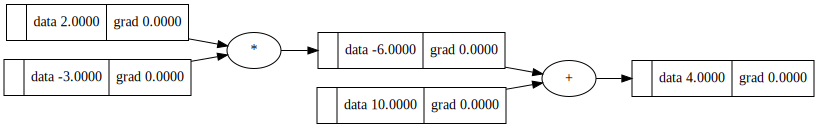

In [ ]:
draw_dot(d)

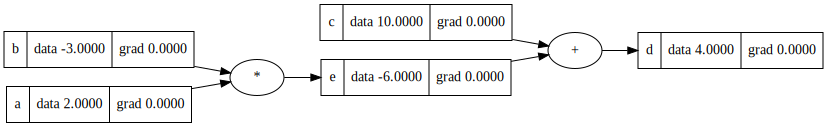

In [ ]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label="e"
d = e + c; d.label="d"
draw_dot(d)

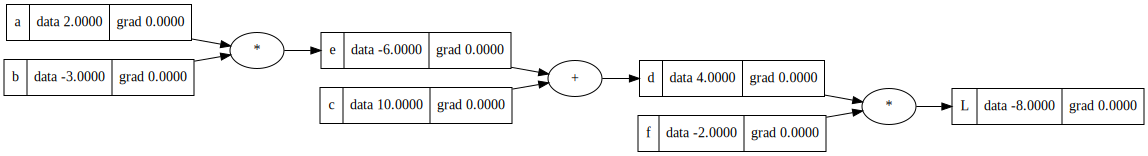

In [ ]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")
e = a*b; e.label="e"
d = e + c; d.label="d"
f = Value(-2.0, label="f")
L = d * f; L.label="L"
draw_dot(L)

# [Bölüm 4: Manuel Geriye Yayılım (Backpropagation) - 1. Örnek: Basit İfade](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=1930s)

In [ ]:
def lol():

  h = 0.0001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label="e"
  d = e + c; d.label="d"
  f = Value(-2.0, label="f")
  L = d * f; L.label="L"
  L1 = L.data

  a = Value(2.0 + h, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label="e"
  d = e + c; d.label="d"
  f = Value(-2.0, label="f")
  L = d * f; L.label="L"
  L2 = L.data

  print((L2 - L1)/h)

lol()

In [ ]:
def lol():

  h = 0.0001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label="e"
  d = e + c; d.label="d"
  f = Value(-2.0, label="f")
  L = d * f; L.label="L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label="e"
  d = e + c; d.label="d"
  f = Value(-2.0, label="f")
  L = d * f; L.label="L"
  L2 = L.data + h

  print((L2 - L1)/h)

lol()

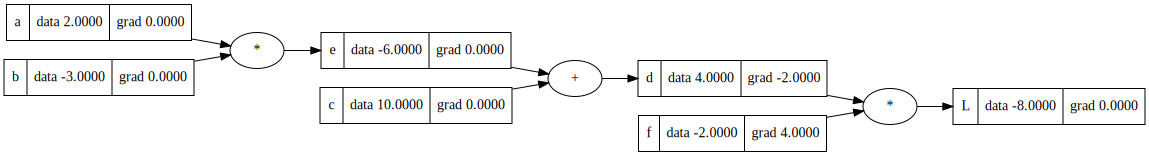

In [ ]:
f.grad = 4.0
d.grad = -2.0
draw_dot(L)

In [ ]:
def lol():

  h = 0.0001

  a = Value(2.0, label="a")
  b = Value(-3.0, label="b")
  c = Value(10.0, label="c")
  e = a*b; e.label="e"
  d = e + c; d.label="d"
  f = Value(-2.0, label="f")
  L = d * f; L.label="L"
  L1 = L.data

  a = Value(2.0, label="a")
  b = Value(-3.0, label ="b")
  c = Value(10.0, label="c")
  e = a*b; e.label="e"
  d = e + c; d.label="d"
  f = Value(-2.0, label="f")
  L = d * f; L.label="L"
  L2 = L.data + h

  print((L2 - L1)/h)

lol()

0.9999999999976694


Karpathy videoda "yerel türev" (local derivative) ile "yukarıdan gelen gradyanı" (upstream gradient) nasıl çarptığını gösteriyor.

İşte bu mantığın detaylı açıklaması:

---

### 🧩 Zincir Kuralı: Toplama İşleminde Geriye Yayılım

Bu senaryoda, bir hesaplama grafiğindeki **Toplama Kapısı'ndan (Add Gate)** geriye doğru akıyoruz. Elimizdeki işlem:

$$ d=c+e $$

#### 1. Bildiklerimiz (Knowns)

Elimizde iki tür bilgi var:

* **Yukarıdan Gelen Gradyan ($
\frac{dL}{dd} = -2.0
$):**
Bu, hesaplama grafiğinin sonundaki Kayıp Fonksiyonunun (Loss), bizim işlem sonucumuz olan 'ye ne kadar duyarlı olduğunu söyler.
* Değer: **-2.0**
* *Anlamı:* Eğer 'yi biraz artırırsan, Loss (Hata) -2.0 oranında azalır.


* **Yerel Türev ($
\frac{dd}{dc} = 1.0
$):**
Bu, sadece kendi küçük işlemimizin ($c+e$) matematiğidir. Toplama işleminde, girdilerden birini artırırsan sonuç da o kadar artar.
* Değer: **1.0**
* *Anlamı:* 'yi 1 birim artırırsan,  de 1 birim artar.



#### 2. İstediklerimiz (Wants)

* **Hedef Gradyan (`dL / dc`):**
Asıl merak ettiğimiz şey şu: "Eğer ben  girdisini (örneğin bir ağırlığı) değiştirirsem, en sondaki Loss ne kadar değişir?"

#### 3. Formül ve Hesaplama

Burada **Zincir Kuralı** devreye girer. Formül şudur:

$$
\frac{dL}{dc}=\frac{dL}{dd}\,\frac{dd}{dc}
$$

Sayıları yerine koyalım:

* $
\frac{dL}{dd} = -2.0
$ (Yukarıdan gelen etki)

* $
\frac{dd}{dc} = 1.0
$ (Yerel etki)


$$
\frac{dL}{dc}=-2.0\times1.0 = -2.0
$$

---

### 💡 Karpathy Tarzı Sezgisel Açıklama

Buradaki mantığı şöyle özetleyebiliriz: **"Toplama İşlemi, gradyanı olduğu gibi geriye dağıtır."**

1. **Yerel Türev 1.0'dır:** Toplama işlemi ($+$), girdileri değiştirmez veya ölçeklemez. Sadece iletir. Bu yüzden yerel türevi her zaman 1.0'dır.
2. **Gradyan Yönlendirici (Gradient Router):** Toplama kapısı, yukarıdan gelen gradyanı (-2.0) alır ve **hiç değiştirmeden** hem $c$'ye hem de $e$'ye kopyalar.

**Kod Karşılığı (Python):**
Micrograd içinde bu işlemi şöyle göreceksin:

```python
# c.grad = (yerel_türev) * (yukarıdan_gelen_gradyan)
c.grad += 1.0 * d.grad
# Sonuç: c.grad = -2.0 olur.
```

**Özet:** Eğer `d` düğümü Loss üzerinde -2.0 kadar etkiliyse ve `c`, `d`'yi birebir etkiliyorsa; o zaman `c` de Loss üzerinde -2.0 kadar etkilidir.

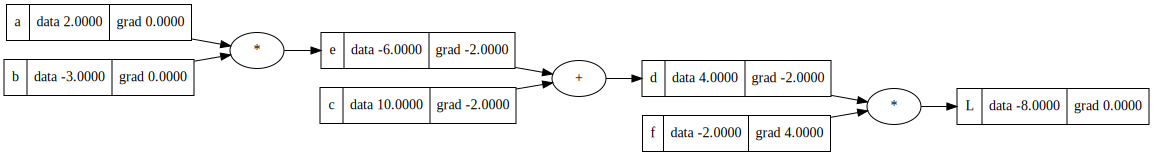

In [ ]:
c.grad = -2.0
e.grad = -2.0
draw_dot(L)

a değişkeninin L de yaptığı değişimi $
\frac{dL}{da}
$ bulalım

$$
\frac{dL}{da}=\frac{dL}{de}\,\frac{de}{da}
$$

bildiklerimiz:
$$
\frac{dL}{de} = -2
\,\
\frac{de}{da} = -3
$$
sonuç:
$$
\frac{dL}{da}= -2\times-3=6
$$

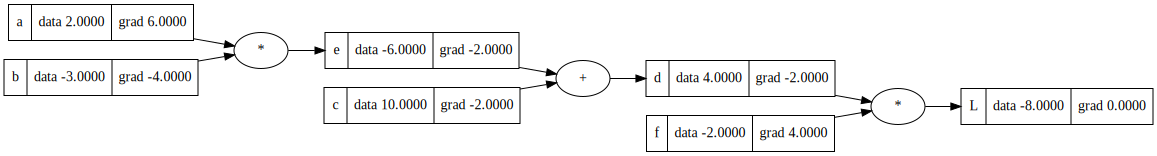

In [ ]:
a.grad = 6.0
b.grad = -4.0
draw_dot(L)

# [Bölüm 5: Optimizasyon Mantığına Giriş: Gradyan ile Değer Güncelleme](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=3070s)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


#  [Bölüm 6: Manuel Geriye Yayılım - 2. Örnek: Tek Nöron](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=3172s)

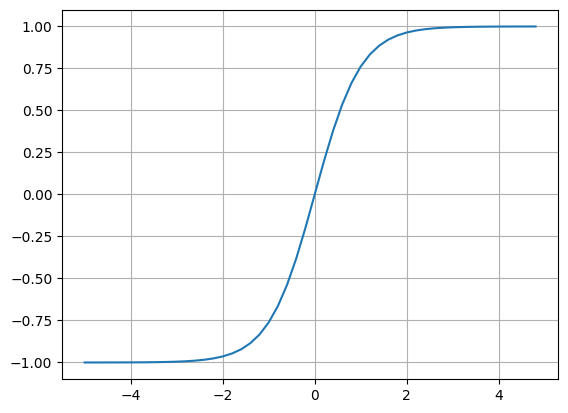

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid()

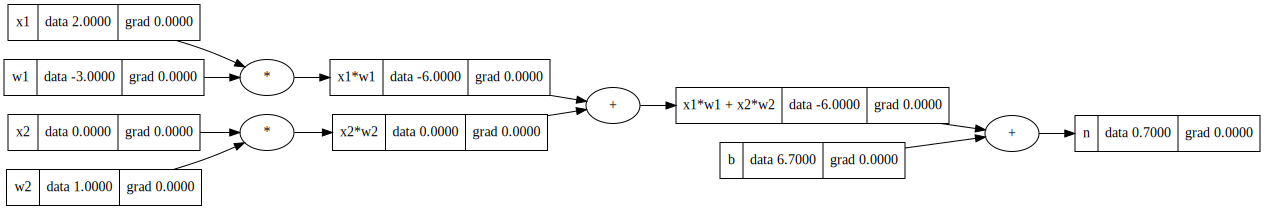

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.7, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

draw_dot(n)

Bu fonksiyon, sinir ağlarının "öğrenme" yeteneği kazanması için en kritik parçalardan biri olan **Aktivasyon Fonksiyonunu (Activation Function)** uygular.

Karpathy'nin bu koddaki amacı, bir `Value` nesnesinin içindeki sayıyı matematiksel olarak **hiperbolik tanjant ()** fonksiyonundan geçirmektir.

### Kısa Özet

Bu metod, elindeki sayıyı (`self.data`) alır ve onu **-1.0 ile 1.0 arasına sıkıştırır (squashing).** Çıktı olarak, geçmişi (`self`) hatırlayan yepyeni bir `Value` nesnesi döndürür.

### Detaylı Açıklama

Bu kod bloğunda üç önemli olay gerçekleşiyor:

1. **Matematiksel Dönüşüm (`t`):**
Kodda gördüğün formül:

$$
\tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}
$$

Bu formül, girdi ne kadar büyük olursa olsun sonucu 1.0'a yaklaştırır (ama asla geçmez), girdi ne kadar küçük olursa olsun sonucu -1.0'a yaklaştırır. 0 civarında ise yumuşak bir geçiş yapar.
2. **Grafiğin Devamlılığı (`out`):**
`out = Value(t, (self, ), 'tanh')` satırı Micrograd'ın sihirli kısmıdır.
* **`t`**: Yeni hesaplanan sıkıştırılmış veri.
* **`(self, )`**: Yeni oluşan düğümün "ebeveyni" (`_children`). Bu sayede `out` nesnesi, "Ben `self` nesnesinden türedim" bilgisini hafızasına kazır. Bu, **Backpropagation** için zorunludur.
* **`'tanh'`**: İşlemin adı (`_op`). Görselleştirme (`draw_dot`) yaparken dairenin içinde "tanh" yazmasını sağlar.


3. **Non-Linearity (Doğrusal Olmayanlık):**
Eğer bu fonksiyonu kullanmazsan, sinir ağın sadece toplama ve çarpma yapan devasa bir hesap makinesi olur. `tanh` (veya ReLU), sisteme "bükülme" yeteneği katar. Bu sayede yapay zeka, düz çizgilerle ayrılamayan karmaşık problemleri çözebilir.

### Kod / Örnek

```python
# Bir nöron çıktısı hayal et (w*x + b sonucu)
n = Value(0.8813735870195432)

# Aktivasyon fonksiyonundan geçiriyoruz
a = n.tanh()

print(a.data)
# Çıktı: 0.707106...
# (Değer biraz küçüldü ve 1 ile -1 arasına hapsedildi)

print(a._op)
# Çıktı: 'tanh'

print(a._prev)
# Çıktı: {Value(data=0.8813...)} -> (Bizim n nesnemiz)

```

### İpucu

Kodun içindeki `(self, )` ifadesindeki virgüle dikkat et. Python'da tek elemanlı bir demet (tuple) oluşturmak için o virgül zorunludur. Eğer virgülü koymazsan Python onu parantez içine alınmış işlem önceliği sanar ve `_children` yapısı bozulur.

In [ ]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    # YENİ: Matematiksel Sıkıştırma (Squashing)
    # Girdiyi alır ve -1.0 ile 1.0 arasına hapseder.
    # Bu formül hiperbolik tanjantın formülüdür.
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

    # YENİ: Aktivasyon Düğümü Yaratma
    # 1. t: Yeni hesaplanan sıkıştırılmış değer.
    # 2. (self, ): Bu yeni değerin "self"ten türediğini hafızaya alır (Backprop için yol haritası).
    # 3. 'tanh': İşlemin adını kaydeder (Görselleştirme için).
    out = Value(t, (self, ), 'tanh')

    return out

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(8.0, label='b')
# b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
# draw_dot(o)

In [ ]:
n.grad = 0.5
o.grad = 1.0
x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

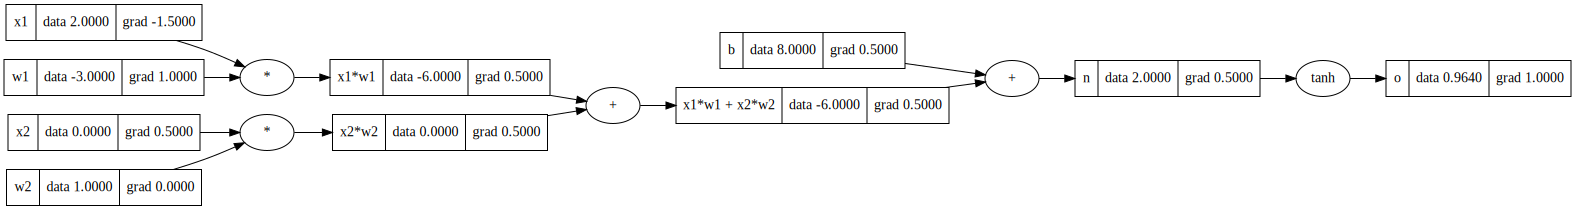

In [ ]:
draw_dot(o)

# [Bölüm 7: Otomasyona Geçiş: İşlem Bazlı `_backward` Fonksiyonları](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=4142s)

In [ ]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0

    # YENİ: Geriye Yayılım Tetikleyicisi
    # Başlangıçta boş bir fonksiyon atıyoruz (lambda: None).
    # Çünkü en dipteki düğümlerin (x, w, b gibi) geriye gönderecek bir ebeveyni yoktur.
    self._backward = lambda: None

    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    # YENİ: Toplama İşleminin Yerel Türev Mantığı (Closure)
    # Bu fonksiyon, "out" düğümünden gelen grad değerini, "self" ve "other"a nasıl paylaştıracağını bilir.
    # Toplama işlemi gradyanı eşit dağıtır (1.0 * out.grad).
    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad

    # YENİ: Fonksiyonu Kaydetme
    # Yazdığımız bu mantığı sonuç düğümüne (out) yapıştırıyoruz.
    # Böylece ileride out.backward() denildiğinde bu fonksiyon çalışacak.
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    # YENİ: Çarpma İşleminin Yerel Türev Mantığı
    # Çarpma kuralı (Chain Rule): self'in türevi other'ın değeriyle, other'ın türevi self'in değeriyle çarpılır.
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad

    # YENİ: Mantığı kaydet.
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    # YENİ: Tanh İşleminin Yerel Türev Mantığı
    # Tanh türevi formülü: (1 - tanh^2). Bunu üstten gelen gradyanla (out.grad) çarparız.
    def _backward():
      self.grad = (1 - t**2) * out.grad

    # YENİ: Mantığı kaydet.
    out._backward = _backward
    return out

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
# draw_dot(o)

In [ ]:
o.grad = 1.0
o._backward()

In [ ]:
n._backward()

In [ ]:
b._backward() # tek node olduğu için gerisi yok o yüzden bu fonksiyon bir şey yapmaz

In [ ]:
x1w1x2w2._backward()

In [ ]:
x1w1._backward()
x2w2._backward()

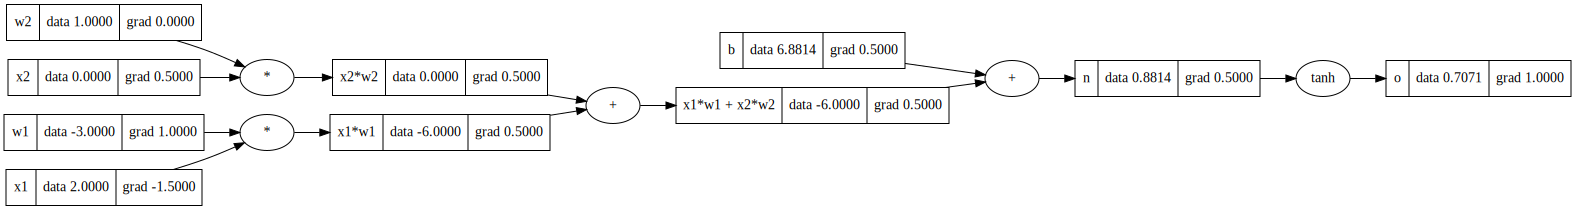

In [ ]:
draw_dot(o)

# [Bölüm 8: Tam Otomatik Geriye Yayılım: Topolojik Sıralama ve `backward()` Metodu](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=4652s)

In [ ]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
# gradları sıfırlamak için hücreyi çalıştırın.
o.grad = 0
n.grad = 0
b.grad = 0
x1w1x2w2.grad = 0
x1w1.grad = 0
x2w2.grad = 0
w1.grad = 0
w2.grad = 0
x1.grad = 0
x2.grad = 0

In [ ]:
o.grad =1.0

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)

for node in reversed(topo):
  node._backward()

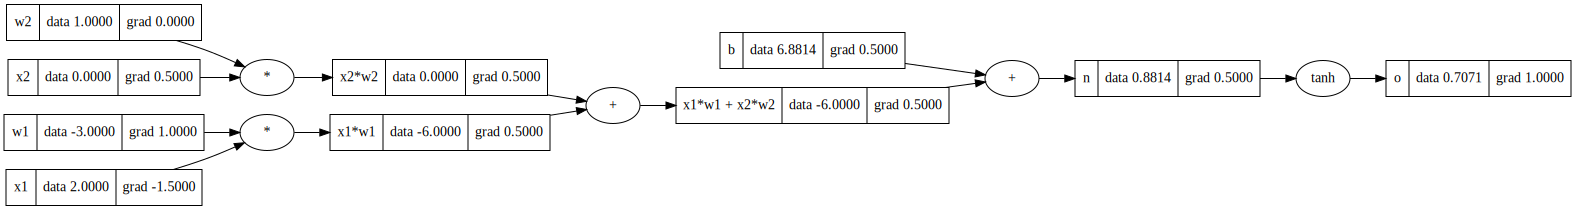

In [ ]:
draw_dot(o)

In [ ]:
class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def backward(self):
    # 1. Topolojik Sıralama Hazırlığı
    # Hesaplama grafiğindeki düğümleri, bağımlılıklarına göre doğru sıraya dizmek için boş bir liste.
    topo = []
    visited = set()

    # 2. Rekürsif (Özyinelemeli) Dolaşma Fonksiyonu
    # Bu fonksiyon, bir düğümü listeye eklemeden önce, onun tüm çocuklarının (prev) listeye eklendiğinden emin olur.
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    # 3. Sıralamayı Başlat
    # Mevcut düğümden (genellikle Loss) başlayarak geriye doğru tüm ağacı gezer ve sıralar.
    build_topo(self)

    # 4. Başlangıç Gradyanı
    # Zincir kuralını başlatmak için en sondaki sonucun kendisine göre türevi her zaman 1'dir (dL/dL = 1).
    self.grad = 1.0

    # 5. Geriye Yayılım (Backpropagation)
    # Oluşturduğumuz listeyi tersten (sondan başa doğru) gezerek, her düğümün sakladığı _backward fonksiyonunu tetikleriz.
    for node in reversed(topo):
      node._backward()


In [ ]:
# gradları sıfırlamak için hücreyi çalıştırın.
o.grad = 0
n.grad = 0
b.grad = 0
x1w1x2w2.grad = 0
x1w1.grad = 0
x2w2.grad = 0
w1.grad = 0
w2.grad = 0
x1.grad = 0
x2.grad = 0

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
# draw_dot(o)

In [ ]:
o.backward()

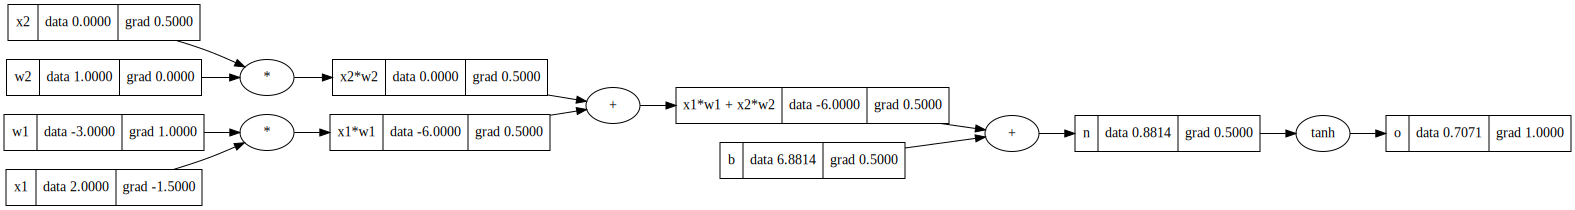

In [ ]:
draw_dot(o)

# [Bölüm 9: Kritik Düzeltme (Bug Fix): Çoklu Kullanım ve Gradyan Biriktirme `(+=)`](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=4948s)

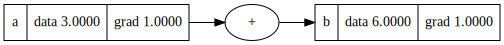

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

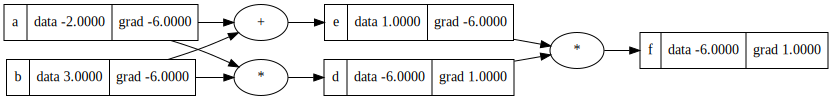

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

Bu kod, Micrograd motorunun **"Bug-Free" (Hatasız)**halidir.

Önceki kod parçalarından farklı olarak burada çok kritik bir **düzeltme (bug fix)** yapılmış. Karpathy videoda bir noktada "Oops, bir hata yaptık" der ve `=` işaretini `+=` ile değiştirir. İşte o versiyon bu.

İşte bu kodun en önemli iki özelliği ve nedenleri:

### 1. Gradyan Biriktirme (`+=` Operatörü)

Önceki kodlarda `self.grad = ...` yazıyorduk. Burada ise `self.grad += ...` yazıyoruz.

* **Neden?** Bir değişken (örneğin `a`), işlem grafiğinde **birden fazla kez** kullanılmış olabilir.
* **Örnek:** `b = a + a` işlemini düşün.
* Matematiksel olarak , yani türev () **2** olmalıdır.
* **Eğer `=` kullanırsan:** `_backward` fonksiyonu çalıştığında, önce ilk `a` için gradyanı 1 yapar, sonra ikinci `a` için gradyanı 1 yapar (öncekini ezer/silip yazar). Sonuç 1 çıkar. **(YANLIŞ)**
* **Eğer `+=` kullanırsan:** İlk koldan gelen 1'i alır, ikinci koldan gelen 1'i üzerine ekler. Sonuç 2 çıkar. **(DOĞRU)**



Buna **Multivariable Chain Rule (Çok Değişkenli Zincir Kuralı)** denir. Bir değişken ne kadar çok yere dağılıyorsa, geri dönerken o kollardan gelen tüm gradyanlar **toplanmalıdır**.

### 2. Otomatik Geriye Yayılım (`backward`)

`backward` metodu artık grafiğin tamamını yönetecek şekilde kurgulanmış.

* **`build_topo`:** Bu fonksiyon, grafiği **Topolojik Sıralama** (Topological Sort) ile dizer. Bu, şu demektir: "Hiçbir düğüm, kendisini oluşturan çocuklar listeye girmeden listeye giremez."
* **`reversed(topo)`:** Bu listeyi ters çevirdiğimizde, tam olarak gradyanın akması gereken sırayı (Loss  Output  Hidden Layers  Weights) elde ederiz.
* **Otomasyon:** Artık her düğüm için tek tek `o._backward()`, `n._backward()` yazmana gerek yok. Sadece en sondaki sonuç düğümünde (örneğin `loss.backward()`) bu fonksiyonu çağırmak, domino taşları gibi tüm türevleri en başa kadar hesaplar.

**Özetle:** Bu kod parçası, artık güvenle kullanabileceğin, matematiksel olarak doğru çalışan bir **Autograd Engine** (Otomatik Türev Motoru) çekirdeğidir.

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

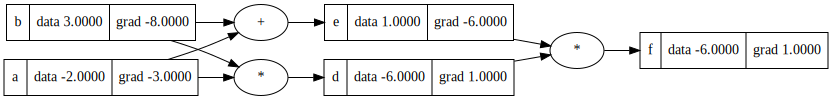

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

# [Bölüm 10: Kapsamı Genişletme: Tanh Ayrıştırması ve Yeni Operatörler](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=5225s)

In [ ]:
# a = Value(2.0)
# a + 1

In [ ]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    # Gelen other değişkeni bir Value nesnesi mi diye bakar. Değilse (örneğin düz bir int veya float ise), onu otomatik olarak Value içine sarar.
    # a + 1 yazabilmek için. Eskiden a + Value(1.0) yazmak zorundaydık. Bu kod, kullanımı çok daha temiz hale getirir.
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __radd__(self, other):
    # "Sağdan toplama/çarpma" (Reverse Add/Mul). Python 2 + a işlemini gördüğünde, İnteger bir değerin Value ile nasıl toplanacağını bilmez.
    # Python o zaman a nesnesine gidip "Senin radd metodun var mı?" diye sorar.
    # Bu metod, 2 + a'yı a + 2'ye çevirerek sorunu çözer. Değişme özelliği (commutativity) kazandırır.
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    # x^k işlemini (power) ve türevini tanımlar.

    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
      # Türevi: Power Rule: dxd​(x^n)=n⋅x^(n−1).
      self.grad += (other * (self.data**(other-1))) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other):
    # Bu metod, 2*a'yı a*2'ye çevirerek sorunu çözer.
    return self * other

  def __truediv__(self, other):
    # Bölme işlemini "üzeri eksi bir ile çarpma" a*(b^-1) olarak tanımlar.
    # Bölme için ayrı bir _backward yazmak yerine, zaten yazdığımız __mul__ ve __pow__ fonksiyonlarını birleştirir. Kod tekrarını önler.
    return self * (other**-1)

  def __neg__(self):
    # -a işlemini a * -1 olarak tanımlar.
    return self * -1

  def __sub__(self, other):
    # a - b işlemini a + (-b) olarak tanımlar.
    return self + (-other)


  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    # e^x fonksiyonunu hesaplar.
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out



  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [ ]:
a = Value(2.0)
a + 1
1 + a

In [ ]:
a = Value(2.0)
a.exp()

In [ ]:
a = Value(2.0)
b = Value(4.0)
a / b

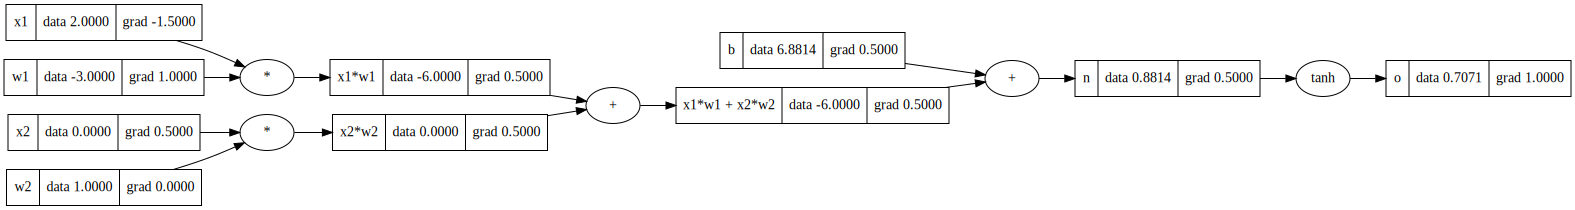

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
draw_dot(o)

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---
e = (2*n).exp()
o = (e-1) / (e+1)
# ---
o.label = 'o'
o.backward()

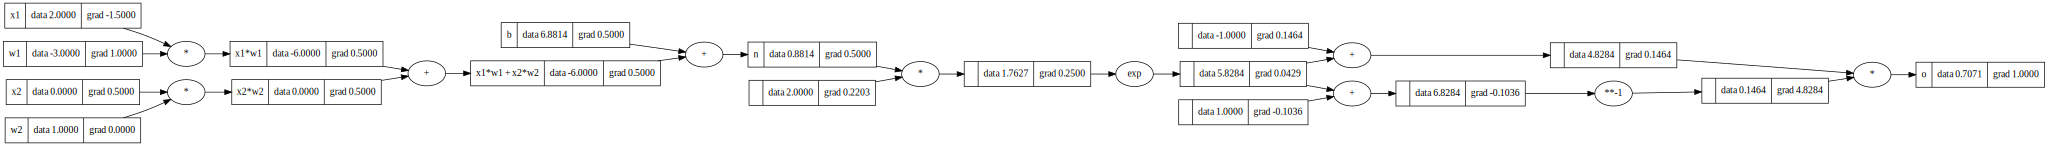

In [ ]:
draw_dot(o)

# [Bölüm 11: Sanayi Standardı ile Kıyaslama: PyTorch vs Micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=5971s)

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

In [ ]:
torch.Tensor([[1,2,3], [4,5,6]])

In [ ]:
torch.Tensor([[1,2,3], [4,5,6]]).shape

In [ ]:
torch.Tensor([2.0])

In [ ]:
torch.Tensor([2.0]).dtype

In [ ]:
torch.Tensor([2.0]).double().dtype

In [ ]:
o

In [ ]:
o.item()

In [ ]:
x2.grad.item()

# [Bölüm 12: Sinir Ağı Katmanları: Nöron, Layer ve MLP Sınıfları](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=6235s)

In [ ]:
import random

### Kısa Özet

Bu kod, Yapay Sinir Ağlarının en temel birimi olan tek bir **Nöron'un iskeletini** oluşturur. Nöronun başlangıç parametrelerini (ağırlıklar ve bias) rastgele sayılarla başlatır.

### Detaylı Açıklama

Bu sınıf, biyolojik bir nöronun matematiksel modelini kurar.

1. **`__init__(self, nin)`: Başlangıç (Initialization)**
* **`nin` (Number of Inputs):** Bu nörona kaç tane veri girişi olacağını belirtir.
* **`self.w` (Weights/Ağırlıklar):** Her bir giriş için bir "önem katsayısı" oluştururuz.
* `random.uniform(-1, 1)`: Ağırlıkları -1 ile 1 arasında rastgele başlatırız. Buna "Random Initialization" denir.
* `Value(...)`: Bu rastgele sayıları bizim yazdığımız `Value` sınıfına sararız. **Neden?** Çünkü bu ağırlıkların türevini (gradyanını) takip edip onları eğitmek istiyoruz.


* **`self.b` (Bias):** Nöronun tetiklenme eşiğidir. Bu da eğitilebilir bir `Value` parametresidir.


2. **`__call__(self, x)`: Hesaplama (Forward Pass)**
* Bu "sihirli metod" (magic method), oluşturduğun `n` nesnesini bir fonksiyon gibi (`n(x)`) kullanmanı sağlar.
* **Şu anki durum:** Kodda `return 0.0` yazıyor. Bu bir **yer tutucudur (placeholder)**. Yani nöron şu an henüz işlemi yapmıyor, sadece yapıyı kurduk.



### Kod / Örnek: Sahne Arkasında Ne Olmalıydı?

Kodun `__call__` kısmı şu an boş (`0.0`). Ancak sinir ağlarının çalışması için o kısmın matematiksel formülü şöyledir:

### İpucu

Burada `sum()` fonksiyonunu kullanırken `start` parametresi olarak `self.b` (bias) verildiğine dikkat et. Yani işlem şöyledir:
`Bias + (w1*x1) + (w2*x2) + ...`

Senin paylaştığın kodda `n(x)` çalıştığında sonuç `0.0` dönecektir çünkü henüz matematiksel formülü (body) yazmadın. Bir sonraki hücrede bunu tamamlayacaksın.

In [ ]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b (Dot Product / Nokta Çarpımı)
    # zip(self.w, x) -> [(w1, x1), (w2, x2)...] eşleşmesini yapar
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh() # Aktivasyon fonksiyonu
    return out

x = [2.0, 3.0]
n = Neuron(2)
n(x)

## `Layer` sınıfının Karpathy tarzı analizi:

### Kısa Özet

Bu kod, birden fazla nöronu bir araya getirerek bir **Nöron Katmanı** oluşturur. Bu katmandaki her nöron, **aynı girdiyi (`x`)** alır ama kendi benzersiz ağırlıkları (`w`) ve önyargısı (`b`) ile farklı bir sonuç üretir.

### Detaylı Açıklama

`Layer` sınıfı, nöronlardan oluşan bir liste yöneticisi gibidir.

1. **`__init__(self, nin, nout)`: Katmanı İnşa Etmek**
* **`nin` (Number of Inputs):** Bu katmana dışarıdan kaç tane sinyal girecek? (Örneğimizde `x` 2 elemanlı, yani `nin=2`).
* **`nout` (Number of Outputs):** Bu katmanda kaç tane nöron olacak? (Örneğimizde 3 nöron istiyoruz).
* **`self.neurons`:** Kodda `[Neuron(nin) for _ in range(nout)]` satırı ile `nout` kadar nöron yaratıp bir listeye koyuyoruz.
* **Mantık:** Her nöron birbirinden bağımsızdır (random weights). Hepsi aynı `x` verisine bakmaya hazırdır.




2. **`__call__(self, x)`: İleri Yayılım (Forward Pass)**
* Burada katmana veriyi (`x`) veriyoruz.
* **`outs`:** List comprehension (`[n(x) for n in self.neurons]`) ile elimizdeki `x` verisini sırayla listedeki her nörona gönderiyoruz.
* **Sonuç:** Her nöron bir `Value` (sayı) üretir. `Layer` sınıfı bu sayıları toplayıp bir liste olarak geri döndürür.



### Görselleştirme (Mental Model)

Bunu şöyle düşün:

* **Girdi (`x`):** `[2.0, 3.0]` (İki kablo geliyor).
* **Katman (`Layer`):** 3 tane Nöron var.
* **Bağlantı:** Gelen 2 kablo, 3 nöronun **hepsine birden** bağlanır.
* **Çıktı:** Her nöron bir sonuç üretir, elinde 3 tane sonuç (`Value`) olur.

```text
       Input (2)        Layer (3 Neurons)      Output (3)
     /---------->  (Neuron 1)  -------->  Value 1
   x1
     \---------->  (Neuron 2)  -------->  Value 2
   x2
     \---------->  (Neuron 3)  -------->  Value 3

```

### Kod / Örnek Analizi

```python
x = [2.0, 3.0]
n = Layer(2, 3) # 2 girişli, 3 nöronlu bir katman
sonuc = n(x)
print(sonuc)

```

Bu kodu çalıştırdığında `sonuc` değişkeni, 3 tane `Value` nesnesi içeren bir liste olacaktır. Çünkü katmanında 3 nöron var ve her biri bir fikir (activation) üretti.

**İpucu:**
Bir sonraki adımda bu katmanları (`Layer`) arka arkaya ekleyerek **MLP (Multi-Layer Perceptron)** yani "Çok Katmanlı Algılayıcı"yı oluşturacaksın. O zaman birinci katmanın çıktısı (`outs`), ikinci katmanın girdisi (`x`) olacak!

In [ ]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    zip(self.w, x)
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out


class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs

x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

## `MLP` sınıfının Karpathy tarzı analizi:

### Kısa Özet

`MLP` sınıfı, sinir ağının "beyni"dir. Giriş verisini alır, sırayla tanımladığın katmanlardan (Layer 1 -> Layer 2 -> Output) geçirir ve nihai sonucu üretir. Buna "Zincirleme İleri Yayılım" diyebiliriz.

### Detaylı Açıklama

Bu sınıf, katmanları birbirine bağlayan bir yapıştırıcı görevi görür.

#### 1. `__init__(self, nin, nouts)`: Mimariyi Kurmak

Buradaki matematiksel kurnazlığa dikkat et:

* **`nin`:** Sinir ağının en başına giren veri sayısı (Örn: 3).
* **`nouts`:** Katmanların büyüklüklerini içeren bir liste (Örn: `[4, 4, 1]`). Bu, "Bana 4 nöronlu, sonra yine 4 nöronlu, en sonda da 1 nöronlu katmanlar ver" demektir.
* **`sz` Listesi:** Kodda `sz = [nin] + nouts` diyerek tam bir boyut haritası çıkarıyoruz.
* Örnek: `nin=3`, `nouts=[4, 4, 1]` ise `sz = [3, 4, 4, 1]` olur.


* **`self.layers`:** Döngüye dikkat et: `range(len(nouts))` kadar dönüyoruz.
* **1. Tur (i=0):** `Layer(sz[0], sz[1])` -> `Layer(3, 4)` (3 giriş alıp 4 çıkış verir).
* **2. Tur (i=1):** `Layer(sz[1], sz[2])` -> `Layer(4, 4)` (Öncekinin çıktısı olan 4'ü giriş olarak alır).
* **3. Tur (i=2):** `Layer(sz[2], sz[3])` -> `Layer(4, 1)` (Sonuç katmanı).



Bu döngü, katmanların "giriş-çıkış" uyumunu otomatik olarak sağlar.

#### 2. `__call__(self, x)`: Sinyali Akıtmak

* **`x`:** Başlangıçtaki ham veri.
* **Döngü:** `for layer in self.layers:`
* `x = layer(x)` satırı çok kritiktir.
* `x` önce ham veridir. Birinci katmana girer, birinci katmanın çıktısı olur.
* Sonra o çıktı ikinci katmana girer, ikinci katmanın çıktısı olur.
* Bu, son katmana kadar devam eder.


* Bir bayrak yarışında bayrağın elden ele (katmandan katmana) geçmesi gibidir.

### Görselleştirme (Mental Model)

Bir MLP (3 giriş, [4, 4, 1] yapılandırması) şöyle görünür:

```text
Giriş (3)      Gizli Katman 1 (4)    Gizli Katman 2 (4)    Çıkış (1)
   O ----------------- O ------------------ O
   O ----------------- O ------------------ O ---------------- O -> Sonuç
   O ----------------- O ------------------ O
                       O ------------------ O

```

*Oklar (bağlantılar) her nöronun `w` (ağırlık) değerleridir.*

### Kod / Örnek Analizi

```python
x = [2.0, 3.0, -1.0] # 3 tane giriş verisi
n = MLP(3, [4, 4, 1]) # 3 girişli, 2 tane 4'lük gizli katmanlı ve 1 çıkışlı ağ
sonuc = n(x)
print(sonuc)

```

Bu kodu çalıştırdığında, `Value` tipinde tek bir sonuç alırsın. Bu sonuç, ağın o anki (rastgele) ağırlıklarıyla yaptığı tahmindir.

### İpucu

Şu an elimizde çalışan bir "beyin" var ama henüz eğitilmedi (bebek gibi). Eğitmek için bu ağın içindeki **tüm parametreleri (`w` ve `b`'leri)** toplayıp, Loss fonksiyonuna göre türevlerini almamız gerekecek.

Bir sonraki adımda `parameters()` fonksiyonunu `MLP`, `Layer` ve `Neuron` sınıflarına ekleyerek, ağdaki binlerce ağırlığı tek bir liste haline getirmeyi göreceğiz. Bu, optimizasyon (SGD) için şarttır.

In [ ]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    zip(self.w, x)
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out


class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs


class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

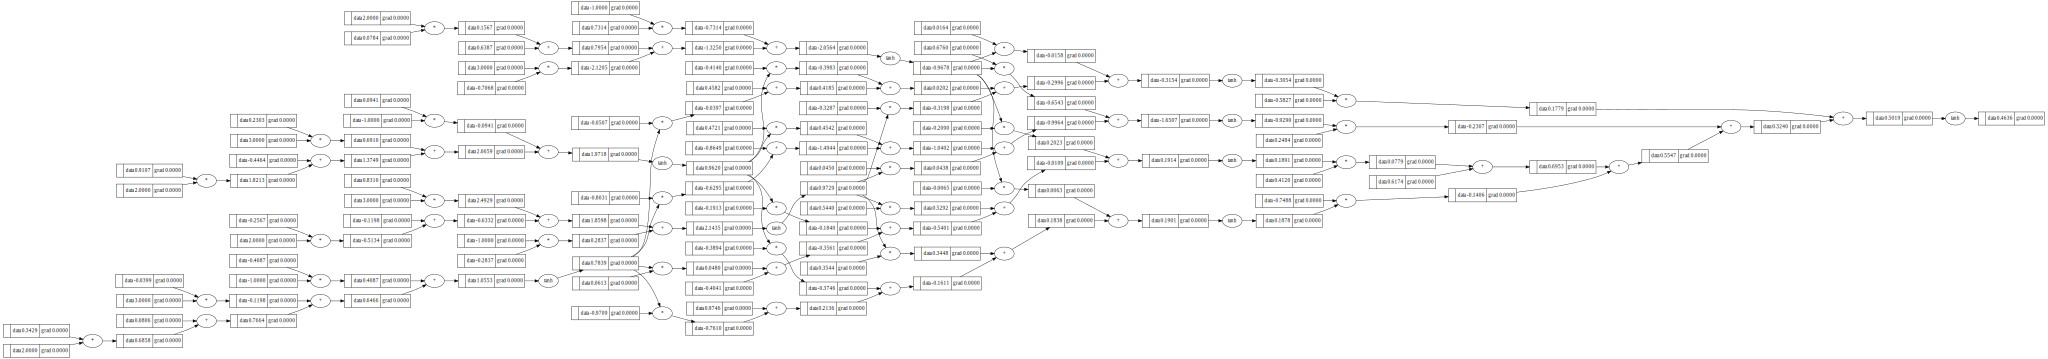

In [ ]:
draw_dot(n(x))

# [Bölüm 13: Veri Seti Oluşturma ve Kayıp Fonksiyonu (Loss Function)](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=6664s)

Artık elimizde bir sinir ağı mimarisi (MLP) var, ancak bu ağ henüz "eğitilmemiş" durumda. Bu kod parçasıyla, ağın ne kadar hata yaptığını ölçüyoruz.

İşte bu hücrelerin Karpathy mantığıyla analizi:

### 1. Veri Kümesi (`xs` ve `ys`)

Sinir ağını eğitmek için örnek bir "dünya" yaratıyorsun.

* **`xs` (Inputs):** 4 farklı örnekten oluşan bir veri kümesi. Her örnek 3 boyutlu bir vektör.
* **`ys` (Targets):** Bu girdilere karşılık ağın üretmesini istediğin "ideal" sonuçlar.
* Örn: `[2.0, 3.0, -1.0]` girdiğinde sonucun `1.0` çıkmasını istiyoruz.



### 2. İleri Yayılım (`ypred`)

```python
ypred = [n(x) for x in xs]
```

* **Ne Yapıyor:** Yarattığın `n` (MLP) nesnesini kullanarak her bir girdi (`x`) için bir tahmin (`ypred`) üretiyorsun.
* **Karpathy Notu:** Ağ henüz eğitilmediği (ağırlıklar rastgele olduğu) için bu tahminler muhtemelen hedeflerden (`ys`) çok uzaktır.

### 3. Kayıp Fonksiyonu (`loss`)

```python
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
```

Bu satır, eğitimin kalbidir. Karpathy burada **Ortalama Kare Hata (Mean Squared Error - MSE)** mantığını kullanıyor:

1. **Fark (`yout - ygt`):** Ağın tahmini ile gerçek hedef arasındaki farkı (hata miktarı) bulur.
2. **Kare Alma (`**2`):** Hatanın her zaman pozitif olmasını sağlar (hatanın yönünden ziyade büyüklüğü önemlidir) ve büyük hataları daha ağır cezalandırır.
3. **Toplam (`sum`):** Tüm veri kümesi boyunca yapılan toplam hatayı tek bir sayıya indirger.

---

### Detaylı Analiz: "Neden Bu Sayı Çok Önemli?"

`loss` değeri, sinir ağının şu an ne kadar "mutsuz" olduğunu gösteren tek bir skaler sayıdır.

* **Loss yüksekse:** Ağ çok kötü tahminler yapıyor demektir.
* **Loss 0'a yakınsa:** Ağ mükemmel öğrenmiş demektir.

Karpathy'nin videoda vurguladığı sihir şudur: `loss` bir `Value` nesnesidir. Bu yüzden `loss.backward()` dediğin anda, en sondaki bu "mutsuzluk" puanından başlayarak, en baştaki ağırlıklara (`w`) kadar tüm türevler hesaplanır.

### İpucu

Videonun bir sonraki adımında şuna dikkat et: `loss` değerini düşürmek için her bir parametrenin (`p`) değerini, gradyanının **tersi** yönünde küçük bir adımla (`learning rate`) değiştireceksin.

```python
# Bir sonraki adımın fragmanı:
for p in n.parameters():
    p.data += -0.01 * p.grad
```

Şu an elinde her şeyiyle hazır bir "hesaplama grafiği" var. Tek yapman gereken bu `loss` düğümünü "geriye doğru sarsmak" (`.backward()`) ve ağırlıkları güncellemek!

Bir sonraki adımda tüm parametreleri (`n.parameters()`) toplayıp bir döngü kurmaya hazır mısın?

In [ ]:
xs = [
  [2.0, 3.0, -1.0],  # hedef: 1.0
  [3.0, -1.0, 0.5],  # hedef: -1.0
  [0.5, 1.0, 1.0],   # hedef: -1.0
  [1.0, 1.0, -1.0],  # hedef: 1.0
]
ys = [1.0, -1.0, -1.0, 1.0] # istenen hedefler

In [ ]:
ypred = [n(x) for x in xs]
ypred

In [ ]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

In [ ]:
loss.backward()

In [ ]:
n.layers[0].neurons[0].w[0].grad

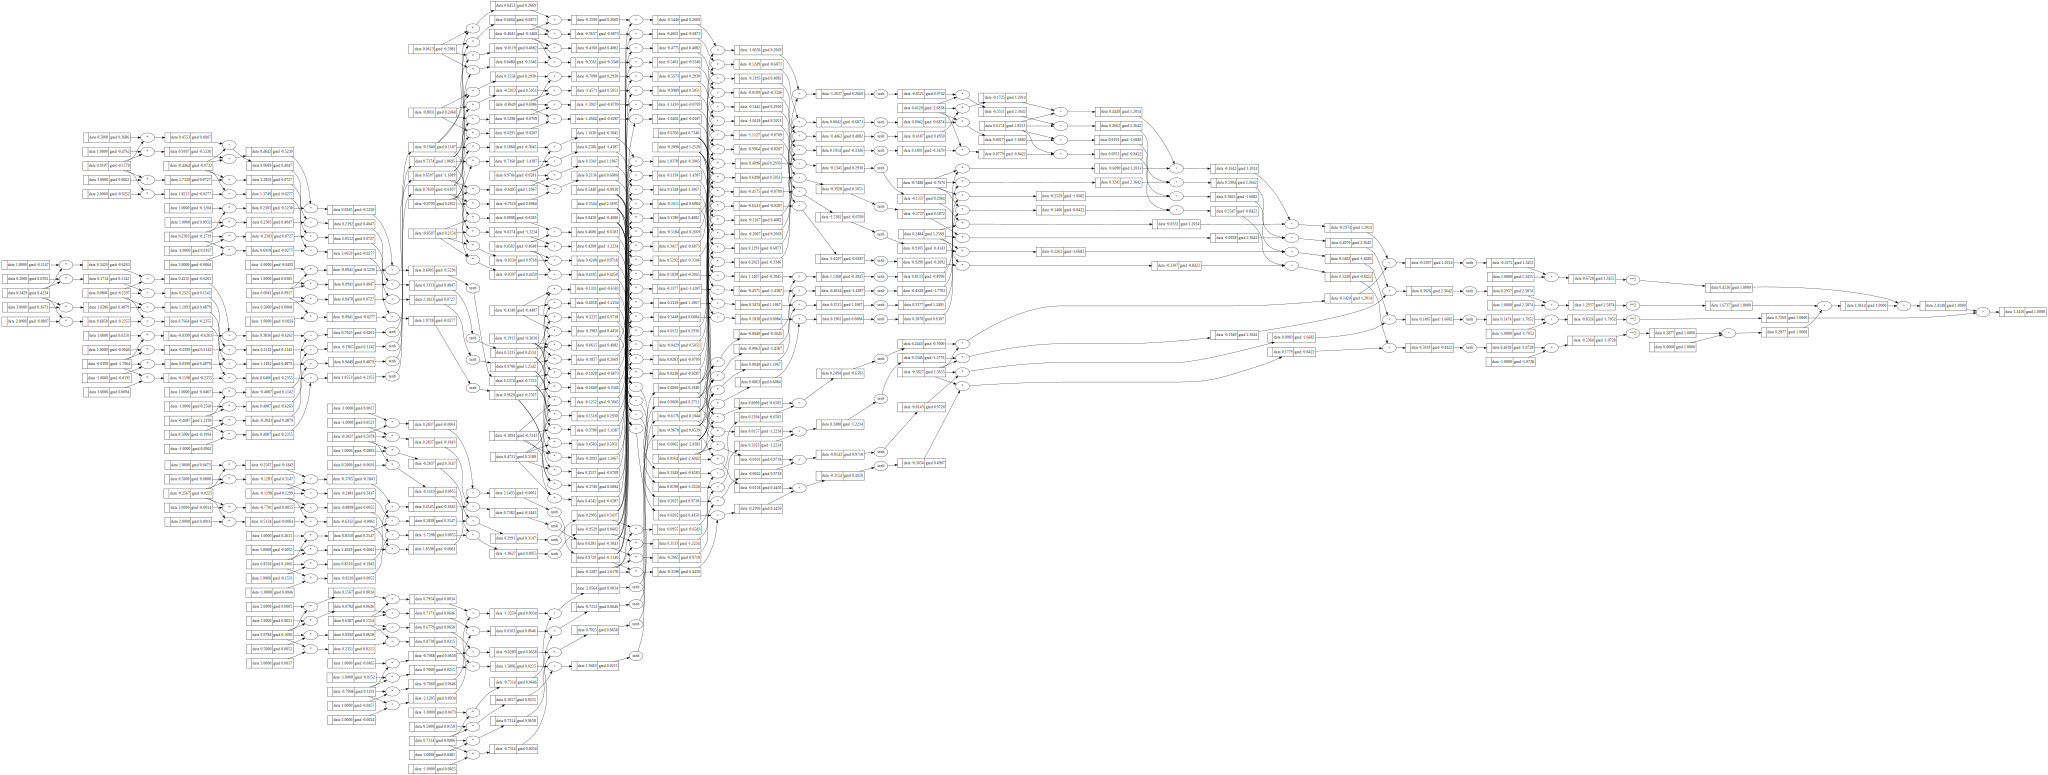

In [ ]:
draw_dot(loss)

# [Bölüm 14: Parametre Yönetimi: Tüm Ağırlıkları Toplamak (parameters)](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=7076s)

### Neden Buna İhtiyacımız Var?

Eğitim döngüsünde (Training Loop) şunu yapmak istiyoruz:
*"Ağdaki **HER** parametreyi, hatayı azaltacak yönde birazcık değiştir."*

Eğer bu `parameters()` fonksiyonu olmasaydı, şöyle korkunç bir kod yazmak zorunda kalırdık:
`n.layers[0].neurons[0].w[0].data += ...`
`n.layers[0].neurons[0].w[1].data += ...`
... (Binlerce satır)

Ama şimdi şunu yapabileceğiz:

```python
for p in n.parameters():
    p.data += -0.01 * p.grad
```
Tek bir döngü ile tüm beyni güncelleyeceğiz! Bu, derin öğrenme kütüphanelerinin (PyTorch `model.parameters()`) temel tasarım desenidir.

In [ ]:
class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    zip(self.w, x)
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    # Görevi: Katmandaki tüm nöronların parametrelerini tek bir listede birleştirir.
    # Yöntem: Python'un list comprehension özelliğini kullanarak düzleştirme (flattening) yapar.
    # Sonuç: Katmanında 4 nöron varsa, hepsinin `w` ve `b`lerini tek bir uzun liste yapar.
    return self.w + [self.b]


class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    # Görevi: Katmandaki tüm nöronların parametrelerini tek bir listede birleştirir.
    # Yöntem: Python'un list comprehension özelliğini kullanarak düzleştirme (flattening) yapar.
    # Sonuç: Katmanında 4 nöron varsa, hepsinin w ve blerini tek bir uzun liste yapar.
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    # Görevi: Tüm ağın (bütün katmanların) parametrelerini tek bir devasa listede toplar.
    # Önemi: İşte Stochastic Gradient Descent (SGD) veya diğer optimizasyon algoritmalarının üzerinde çalışacağı liste budur.
    return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

In [ ]:
xs = [
  [2.0, 3.0, -1.0],  # hedef: 1.0
  [3.0, -1.0, 0.5],  # hedef: -1.0
  [0.5, 1.0, 1.0],   # hedef: -1.0
  [1.0, 1.0, -1.0],  # hedef: 1.0
]
ys = [1.0, -1.0, -1.0, 1.0] # istenen hedefler

ypred = [n(x) for x in xs]
ypred

In [ ]:
n.parameters()

In [ ]:
len(n.parameters())

In [ ]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

In [ ]:
loss.backward()

In [ ]:
n.layers[0].neurons[0].w[0].grad

In [ ]:
n.layers[0].neurons[0].w[0].data

# [Bölüm 15: Final: Eğitim Döngüsü (Training Loop) ve Gradyan İnişi (Gradient Descent)](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=7272s)

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

In [ ]:
xs = [
  [2.0, 3.0, -1.0],  # hedef: 1.0
  [3.0, -1.0, 0.5],  # hedef: -1.0
  [0.5, 1.0, 1.0],   # hedef: -1.0
  [1.0, 1.0, -1.0],  # hedef: 1.0
]
ys = [1.0, -1.0, -1.0, 1.0] # istenen hedefler

ypred = [n(x) for x in xs]
ypred

In [ ]:
n.parameters()

In [ ]:
len(n.parameters())

41

In [ ]:
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
# Ne Oluyor? Ağın tahminleri (ypred) ile gerçek doğrular (ys) arasındaki farkın karesini alıp topluyoruz (MSE).
# Anlamı: Bu loss değeri, ağın o anki performans karnesidir. Sayı ne kadar büyükse, ağ o kadar "kötü" durumdadır. Amacımız bu sayıyı 0'a yaklaştırmak.
loss

Value(data=6.541858071280927)

In [ ]:
loss.backward()
# Bu komut çalıştığı an, Micrograd motoru loss düğümünden en başa kadar gider ve ağdaki tüm w ve b değerlerinin .grad kısmını doldurur.

In [ ]:
n.layers[0].neurons[0].w[0].grad

-0.014493724336804813

In [ ]:
n.layers[0].neurons[0].w[0].data

-0.6401971397055086

In [ ]:
for p in n.parameters():
  p.data += -0.01 * p.grad

# Bu küçücük döngü, yapay zekanın öğrenme eylemidir:
# - p.grad (Eğim): Hatanın artış yönünü gösterir.
# - "-"" (Eksi İşareti): Biz hatayı artırmak değil, azaltmak istiyoruz. Bu yüzden eğimin tersi yönünde gitmeliyiz.
# - 0.01 (Learning Rate / Öğrenme Oranı): Bu, adım büyüklüğümüzdür.
#   - Çok büyük yaparsan (örn: 100.0), ağ "patlar" ve hata sonsuza gider.
#   - Çok küçük yaparsan (örn: 0.00001), ağın öğrenmesi yıllar sürer.
# - "+=" (Güncelleme): Mevcut ağırlığı al, hesaplanan miktar kadar değiştir.

In [ ]:
n.layers[0].neurons[0].w[0].grad

-0.014493724336804813

In [ ]:
n.layers[0].neurons[0].w[0].data

-0.6400522024621406

In [ ]:
xs = [
  [2.0, 3.0, -1.0],  # hedef: 1.0
  [3.0, -1.0, 0.5],  # hedef: -1.0
  [0.5, 1.0, 1.0],   # hedef: -1.0
  [1.0, 1.0, -1.0],  # hedef: 1.0
]
ys = [1.0, -1.0, -1.0, 1.0] # istenen hedefler

In [ ]:
ypred = [n(x) for x in xs]
loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(data=6.284534648735955)

In [ ]:
loss.backward()

In [ ]:
for p in n.parameters():
  p.data += -0.01 * p.grad

In [ ]:
for p in n.parameters():
  p.data += -0.1 * p.grad

In [ ]:
ypred

In [ ]:
n.parameters()

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

In [ ]:
xs = [
  [2.0, 3.0, -1.0],  # hedef: 1.0
  [3.0, -1.0, 0.5],  # hedef: -1.0
  [0.5, 1.0, 1.0],   # hedef: -1.0
  [1.0, 1.0, -1.0],  # hedef: 1.0
]
ys = [1.0, -1.0, -1.0, 1.0] # istenen hedefler

ypred = [n(x) for x in xs]
ypred

In [ ]:
for k in range(20):
  # ileri besleme (forward pass)
  ypred = [n(x) for x in xs]
  loss = sum([(yout - ygt)**2 for ygt, yout in zip(ys, ypred)])

  # geri besleme (backward pass)

  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  # güncelleme
  for p in n.parameters():
    p.data += -0.05 * p.grad

  print(k, loss.data)


In [ ]:
ypred